# We Rate Dogs 

**Abdulaziz Alamri** <br><br><br><br>

<a id='intro'></a>
## 1. Introduction
We will document our wrangling efforts, plus showcase them through analyses and visualizations using Python and its libraries and/or SQL.<br><br>
The dataset that we will be wrangling and analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.<br><br>
The purpose and goal of this project is to create a trustworthy and interesting analyses and Visualization based on the wrangled data<br><br><br>


###  Data Gathering 
In this part of the wrangling process : collect the needed data.

1- `Twitter archive csv file`. 

2- `The tweet image predictions tsv file`,

3-  `Twitter API & JSON`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tweepy
import requests
import json
from PIL import Image
from io import BytesIO

In [ ]:
#load data
twitter_data=pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 


**twitter_data** dataset:<br>
- have images are not isolated from the retweets.
- Datatype for the columns (`tweet_id`, `retweeted_status_id`, `retweeted_status_user_id`, `in_reply_to_status_id`, `in_reply_to_user_id`,`timestamp`,  `retweeted_status_timestamp`, `rating_numerator`, `rating_denominator`).
- There are more than one rating to the same tweet. 

- Some names in the (`name`) column are wrongly registered.


2. Tweet Image Predictions

In [ ]:
#load data
prediction=pd.read_csv('image-predictions.tsv',sep='\t')

In [ ]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



<br><br>

**prediction** dataset:<br>
- There are jpg url duplications.
- The dog breeds in the columns (`p1`, `p2` , `p3`) is used instead of space.
- Some image predictions are not dog breeds.
- There are columns that will not be used in the analyses.
<br><br>

In [ ]:
#deleted api infos as instructed
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
# Fetch tweets from the twitter API:
tweets_list = []
# Tweets that can't be found:
no_tweets_list = []
for tweet_id in twitter_data['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        no_tweets_list.append(tweet_id)

In [ ]:
#Isolating the json part
dicts = []
for each_json_tweet in tweets_list:
    dicts.append(each_json_tweet._json)

In [ ]:
#json to txt
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(dicts, indent=4))

In [ ]:
demo = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        demo.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
       

In [ ]:
tweet_json= pd.DataFrame(demo, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [ ]:
 tweet_json.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url


In [ ]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          0 non-null      object
 1   favorite_count    0 non-null      object
 2   retweet_count     0 non-null      object
 3   created_at        0 non-null      object
 4   source            0 non-null      object
 5   retweeted_status  0 non-null      object
 6   url               0 non-null      object
dtypes: object(7)
memory usage: 0.0+ bytes


**Assesing** **Data**

**Virtual** **Assesment**


We will view all the three data that we have gathered above and assess them for Tidiness and Quality issues.

In [ ]:
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Tweet Image Predictions

In [ ]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. The Tweet JSON

In [ ]:
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url



**Programmatic Assessment**

Assesing all three gathered data using different Pandas Functions



In [ ]:
twitter_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2142,669972011175813120,NaN,NaN,2015-11-26 20:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see really big dog cuddling smaller do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669972011...,10,10,None,None,None,None,None
419,822244816520155136,NaN,NaN,2017-01-20 00:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,None,None,None
1335,705239209544720384,NaN,NaN,2016-03-03 03:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
1952,673680198160809984,NaN,NaN,2015-12-07 01:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shnuggles. I would kill for Shnuggles....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673680198...,13,10,Shnuggles,None,None,None,None
646,793150605191548928,NaN,NaN,2016-10-31 18:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nida. She's a free elf. Waited so long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793150605...,11,10,Nida,None,None,None,None
1713,680473011644985345,NaN,NaN,2015-12-25 19:39:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hector. He thinks he's a hammer. Silly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680473011...,10,10,Hector,None,None,pupper,None
391,826204788643753985,NaN,NaN,2017-01-30 23:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a little more info on Dew, your favorit...",NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/kentuc...,13,10,None,doggo,None,None,None
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,a,None,None,None,None


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
#Dyplicate data
sum(twitter_data.duplicated())

0

In [ ]:
# missing values
twitter_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [ ]:
twitter_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64



**twitter_data** dataset:<br>
- The column (`tweet_ids`) name does not match with the other datasets' name (problem when merging).

- Datatype for the column (`Date_Time`).
- Datatype for the column (`tweet_id`).
<br><br><br>



10 is the standard rating_denominator, other numbers need to be corrected if they were wrongly interpreted.

In [ ]:
twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

2. Image Predictions

In [ ]:
prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
1578,796149749086875649,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
351,672523490734551040,https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg,1,golden_retriever,0.565981,True,chow,0.081212,True,Irish_terrier,0.061596,True
84,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
816,692828166163931137,https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg,1,Samoyed,0.985857,True,Arctic_fox,0.007852,False,white_wolf,0.003278,False
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [ ]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
#Check duplicates in jpg_url as same url means duplicated data
sum(prediction.jpg_url.duplicated())

66

In [ ]:
prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [ ]:
prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [ ]:
prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [ ]:
prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

3. Tweet JSON

In [ ]:
tweet_json.sample

<bound method NDFrame.sample of Empty DataFrame
Columns: [tweet_id, favorite_count, retweet_count, created_at, source, retweeted_status, url]
Index: []>

In [ ]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          0 non-null      object
 1   favorite_count    0 non-null      object
 2   retweet_count     0 non-null      object
 3   created_at        0 non-null      object
 4   source            0 non-null      object
 5   retweeted_status  0 non-null      object
 6   url               0 non-null      object
dtypes: object(7)
memory usage: 0.0+ bytes


In [ ]:
sum(tweet_json.duplicated())

0

In [ ]:
tweet_json.retweeted_status.value_counts()

Series([], Name: retweeted_status, dtype: int64)

In [ ]:
tweet_json.source.value_counts()

Series([], Name: source, dtype: int64)


# Cleaning Plan Summary
**Tidiness Issues**

Twitter Archive WeRateDogs

    Columns 'doggo', 'floofer', 'pupper', 'puppo' in df_tw should be a single column stage
    Change tweet_id to type int64 in order to merge with the other 2 tables

Tweet JSON

    Join 'tweet_json' and 'predictions' to 'twitter_data'

Quality Issues

Twitter Archive WeRateDogs

    Delete columns that won't be used for analysis
    The datatype of "timestamp" is not correct.
    The standard for "rating_denominator" is 10 correct the same.
    The "rating_numerator" also has some incorrect values.
    The dog names format should be consistent. Make the first letter capital for all the names.

 Predictions

    Drop duplicate values from jpg_url
    The column names such as p1,p2 are not decriptive.
    The prediction dog breeds involve both uppercase and lowercase for the first letter.

Tweet JSON

    Delete columns that won't be used for analysis

Tidiness
Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_data should be a single column stage


**Code**

In [ ]:
# make copies for cleaning
twitter_data_clean = twitter_data.copy()
prediction_clean = prediction.copy()
tweet_json_clean = tweet_json.copy()

In [ ]:
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_data_clean[i] = twitter_data_clean[i].replace('None', '')

In [ ]:
# use cat to combine 
twitter_data_clean['stage'] = twitter_data_clean.doggo.str.cat(twitter_data_clean.floofer).str.cat(twitter_data_clean.pupper).str.cat(twitter_data_clean.puppo)

# drop the four old colomns
twitter_data_clean = twitter_data_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_data_clean['stage'] = twitter_data_clean['stage'].replace('', np.nan)

**Test**

In [ ]:
twitter_data_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1315,706681918348251136,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Katie. She's a Mitsubishi Hufflep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,NaN
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,pupper
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,NaN
528,808501579447930884,NaN,NaN,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808501579...,12,10,Koda,NaN
1921,674262580978937856,NaN,NaN,2015-12-08 16:21:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's super stoked about being an ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674262580...,9,10,Gus,pupper


In [ ]:
tweet_json_clean['tweet_id']= pd.to_numeric(tweet_json_clean['tweet_id'])

**Quality Issues**

Delete columns that won't be used for analysis

In [ ]:
twitter_data_clean = twitter_data_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

In [ ]:
twitter_data_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [ ]:
twitter_data_clean['timestamp'] = pd.to_datetime(twitter_data_clean['timestamp'])

In [ ]:
twitter_data_clean.timestamp.dtypes

datetime64[ns, UTC]

### The standard for "rating_denominator" is 10

In [ ]:
temp_df = twitter_data_clean[twitter_data_clean['rating_denominator'] != 10]
temp_df[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50


In [ ]:
twitter_data_clean.loc[twitter_data_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_data_clean.loc[twitter_data_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_data_clean.loc[twitter_data_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_data_clean.loc[twitter_data_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_data_clean.loc[twitter_data_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [ ]:
twitter_data_clean.loc[twitter_data_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_data_clean.loc[twitter_data_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter_data_clean.loc[twitter_data_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_data_clean.loc[twitter_data_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_data_clean.loc[twitter_data_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

In [ ]:
twitter_data_clean['name'].str.islower().sum()

109

In [ ]:
twitter_data_clean['name'] = twitter_data_clean.name.str.capitalize()

In [ ]:
prediction_clean = prediction_clean.drop_duplicates(subset=['jpg_url'], keep='first')

In [ ]:
prediction_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [ ]:
prediction_clean.head(2)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [ ]:
prediction_clean['first_prediction'] = prediction_clean.first_prediction.str.capitalize()
prediction_clean['second_prediction'] = prediction_clean.second_prediction.str.capitalize()
prediction_clean['third_prediction'] = prediction_clean.third_prediction.str.capitalize();

In [ ]:
tweet_json_clean=tweet_json_clean.drop(['created_at','source','retweeted_status','url'],1)

In [ ]:
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count


## Join 'tweet_json' and 'prediction' to 'twitter_data'

In [ ]:
#image_prediction_clean to twitter_data
twitterdata = pd.merge(twitter_data_clean, 
                      prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
twitterdata = twitterdata[twitterdata['jpg_url'].notnull()]

In [ ]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2009 non-null   int64              
 1   timestamp           2009 non-null   datetime64[ns, UTC]
 2   text                2009 non-null   object             
 3   rating_numerator    2009 non-null   int64              
 4   rating_denominator  2009 non-null   int64              
 5   name                2009 non-null   object             
 6   stage               310 non-null    object             
 7   jpg_url             2009 non-null   object             
 8   img_num             2009 non-null   float64            
 9   first_prediction    2009 non-null   object             
 10  first_confidence    2009 non-null   float64            
 11  first_dog           2009 non-null   object             
 12  second_prediction   2009 non-null 

In [ ]:
twitter = pd.merge(twitterdata, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

In [ ]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,NaN


<a id='store'></a>
## Data Storing

In [ ]:
#Store in a CSV file
twitter.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

In [ ]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,NaN


<a id='A&V'></a>
## Data Analysis and Visualization
<br>

###Questions:
- Where the majority? 
- Most Popular Dog Breeds? 
- Retweet Count, Favorite Count and Ratings?

## Where the majority? 

Text(0.5, 1.0, 'Distribution Of The Rating Numerator')

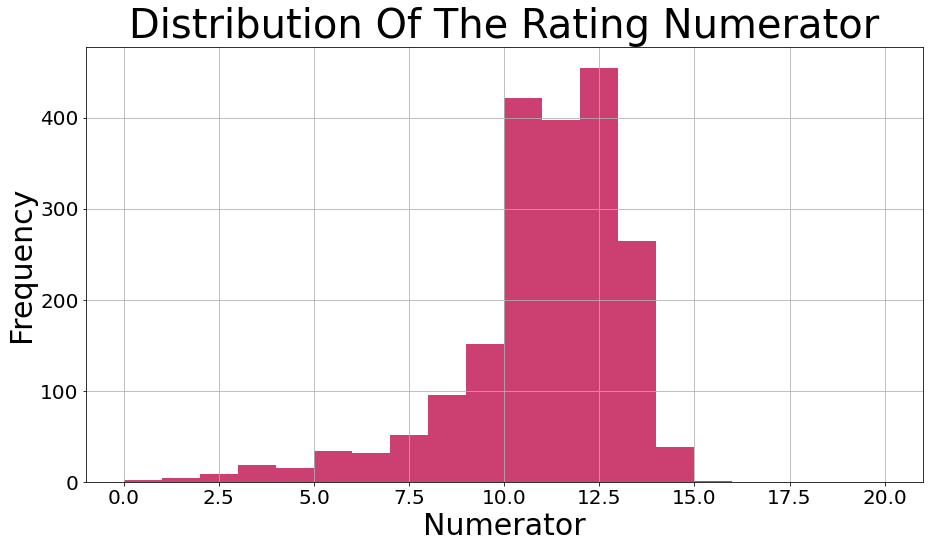

In [ ]:
color1=['#cc3f71']
twitter.hist(column='rating_numerator', bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], color=color1, figsize=(15,8))
plt.xlabel('Numerator', size=30)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', size=30)
plt.yticks(fontsize=20)
plt.title('Distribution Of The Rating Numerator', size=40)

the majority of the numerators lies between 10 and 13

## Most Popular Dog Breeds

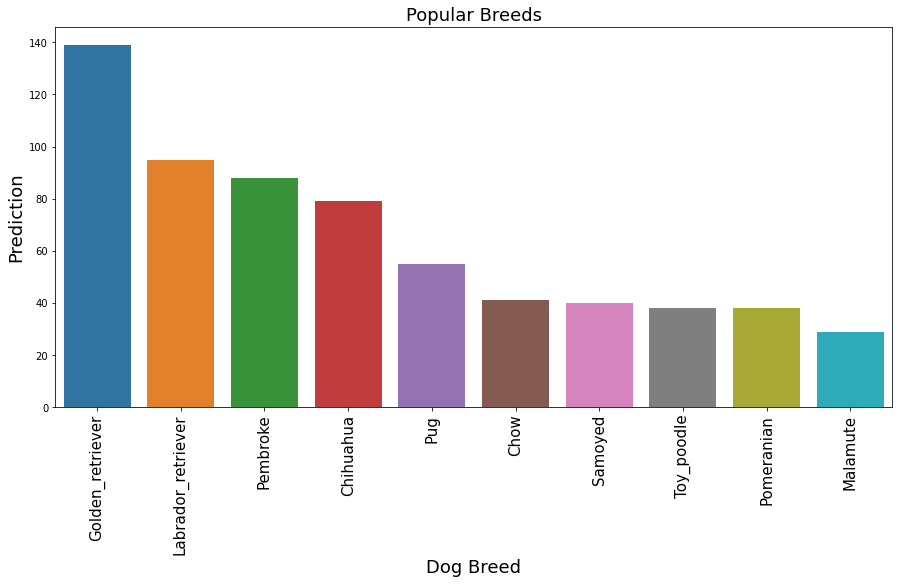

In [ ]:
plt.figure(figsize = (15,7))
ax = sb.barplot(x = twitter['first_prediction'].value_counts()[0:10].index,
            y =twitter['first_prediction'].value_counts()[0:10],
            data = twitter);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breed",fontsize = 18);
plt.ylabel("Prediction",fontsize = 18);
plt.title("Popular Breeds",fontsize = 18);

### Retweet Count, Favorite Count and Ratings

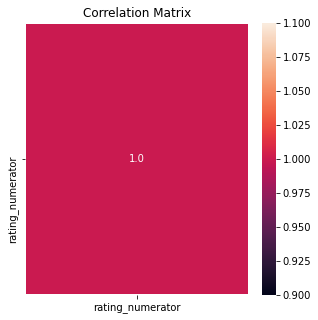

In [ ]:
#Plotting  Retweet Count, Favorite Count and Ratings 
f,ax = plt.subplots(figsize=(5, 5))
sb.heatmap(twitter[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');


<br><br><br>
## Conclusion <br>
We did a great job at this project, form gathering data to assessing it and cleaning it and then analyzing it. 
- There were some problems though.
- Missing tweet_ids that we couldn't scrape their data from Twitter.
- The dataset needs further cleaning and assessment.